# Modelos de regresión

### Información del curso:
- **Nombre del curso**: Introducción al aprendizaje automático
- **Profesor**: Dr. Jesús Emmanuel Solís Pérez
- **Email**: jsolisp@unam.mx
- **Semestre**: 2025-1
- **Fecha**: Diciembre 09, 2024
- **Enlace del curso**: [https://jesolisp.github.io/Curso-Introduccion-Aprendizaje-Automatico](https://jesolisp.github.io/Curso-Introduccion-Aprendizaje-Automatico/docs/home.html)

---

### Información del Notebook:
- **Título del Notebook**: Modelos de regresión
- **Versión**: 1.0
- **Última modificación**: November 17, 2024
- **Descripción**: Este cuaderno tiene como finalidad dar a conocer las aplicaciones y tipos de aprendizaje automático.

---

### Instrucciones:
1. **Orden de ejecución de celdas**: Ejecute las celdas en el orden presentado para garantizar que las dependencias se manejen adecuadamente.
2. **Envío**: Guarde y envíe este cuaderno como un archivo `.ipynb` antes de la fecha de vencimiento.
3. **Comentarios y documentación**: asegúrese de agregar comentarios y documentación adecuados a su código.

---

### Licencia:
- Este cuaderno se proporciona únicamente con fines educativos. Todos los derechos reservados © 2024 ENES Juriquilla.

---

# Modelos lineales
Son modelos ampliamente utilizados en la práctica y muy usados en las últimas décadas. Estos modelos relacionan de forma lineal las variables regresoras $x_{p}$, la variable respuesta $y$ y la media $\mu$ de $y$, de acuerdo con la siguiente expresión

$$
 \mu_{y} = \beta_{0} + \beta_{1}\cdot x_{1} + \beta_{2}\cdot x_{2} + \cdots + \beta_{p}\cdot x_{p},
$$

En algunos libros de estadística es posible que los encontremos bajo el nombre de _modelos de regresión poblacional_ cuya expresión está dada como sigue

$$
 y_{i} = \beta_{0} + \beta_{1}\cdot x_{i1} + \beta_{2}\cdot x_{i2} + \cdots + \beta_{p}\cdot x_{ip} + \varepsilon_{i},
$$
donde $i$ representa una observación concreta.

## Regresión lineal (mínimos cuadrados ordinarios)
Regresión lineal o *ordinary least squares (OLS)* es el modelo más simple de regresión. Se trata de encontrar los parámetros $\beta_{0},\beta_{1}$ que minimicen el *MSE* entre los datos predichos y los datos reales. Es decir

$$
 \underset{\beta_{0},\beta_{1}}{\min} \left\{ \frac{1}{N} \sum_{k=1}^{N} \left( y - \hat{y} \right)^{2} \right\},
$$
donde

$$
 \hat{y} = \beta_{0} + \beta_{1}\cdot x_{1} + \beta_{2}\cdot x_{2} + \cdots + \beta_{p}\cdot x_{p},
$$ (eqn:ols)

Para problemas en los cuáles sólo tenemos una variable, el modelo de regresión lineal queda expresado como sigue

$$
 \hat{y} = \beta_{1}\cdot x + \beta_{0}.
$$ (eqn:ols_1var)
Aquí, $\beta_{1}$ denota la pendiente y $\beta_{0}$ el intercepto.

Los modelos {eq}`eqn:ols` y {eq}`eqn:ols_1var` se pueden representar de forma matricial como sigue

$$
 \begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n} \end{bmatrix} = \begin{bmatrix} 1 & x_{11} & \dots & x_{1p} \\  1 & x_{21} & \dots & x_{2p} \\ 1 & \vdots & \dots & \vdots \\ 1 & x_{n1} & \dots & x_{np} \end{bmatrix}^{\bf T} \begin{bmatrix} \beta_{0} \\ \beta_{1} \\ \vdots \\ \beta_{n} \end{bmatrix},
$$

y

$$
 \begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n} \end{bmatrix} = \begin{bmatrix} 1 & x_{11} \\ 1 & x_{21} \\ 1 & \vdots \\ 1 & x_{n1} \end{bmatrix} \begin{bmatrix} \beta_{0} \\ \beta_{1} \end{bmatrix}.
$$

Si consideramos un problema matricial lineal de la forma $Ax = b$, podemos encontrar $x$ a partir de la siguiente expresión $x = A^{-1}b$. Aplicando este ejemplo, podemos obtener los coeficientes de los modelos {eq}`eqn:ols` y {eq}`eqn:ols_1var` de la forma $\beta = \left({\bf X}^{T} \right)^{-1}y$. Sin embargo, no es posible calcular $\left({\bf X}^{T} \right)^{-1}$ debido a que ${\bf X}^{T} \in \mathbb{K}^{n\times p}$.

Para resolver este problema, haremos uso de la _pseudoinversa_ o la _inversa de Moore–Penrose_ $A^{+}$. 

````{prf:definition}
 :label: punto-equilibrio
 Para $A\in \mathbb{K}^{n\times p}$, la pseudoinversa de $A$ está definida como una matriz $A \in \mathbb{K}^{n\times p}$ que satisface las condiciones de Moore–Penrose {cite}`cochocki1993neural`:

 1. $AA^{+}A = A$.
 2. $A^{+}AA^{+} = A^{+}$.
 3. $\left(AA^{+}\right)^{*} = AA^{+}$.
 4. $\left(A^{+}A\right)^{*} = A^{+}A$.
````

Si la matriz $A$ es una matriz cuadrada no singular, la pseudoinversa de $A$ es simplemente su inversa. De lo contrario

$$
 A^{+} = \lim _{\lambda \rightarrow 0} \left( A^{\bf T}A + \lambda^{2} I \right)^{-1} A^{\bf T} = \lim _{\lambda \rightarrow 0} A^{\bf T} \left(A A^{\bf T} + \lambda^{2} I \right)^{-1},
$$

o bien

$$
 A^{+} = \left(A^{\bf T} A \right)^{-1} A^{\bf T} = A^{\bf T} \left(A A^{\bf T} \right)^{-1},
$$
si $A^{\bf T}A$ o $A A^{\bf T}$ es no singular.

# Ejemplo. 

Utilizaremos la base de datos de Corvetti del cuaderno anterior para obtener los modelos de regresión lineal. Por consiguiente, la metodología a seguir está dada como sigue:

1. Importación de la base de datos.
2. Análisis de las variables para identificar el tipo de dato.
3. Verificación de valores NaN o Nulos.
4. Distribución de las variables.
5. Cálculo de la matriz de correlación.
6. Procesamiento de datos.
7. Resultados y discusión.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [2]:
# 1. Importamos la base de datos de Corvetti
database = pd.read_csv('./datasets/Saratoga_Houses/SaratogaHouses.csv')
database.head() # mostramos las primeras 5 entradas de la base de datos

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [3]:
# 2. Tipos de dato de cada columna
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [4]:
# 3. Número de datos faltantes, NaN o nulos
database.isna().sum()

price              0
lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
dtype: int64

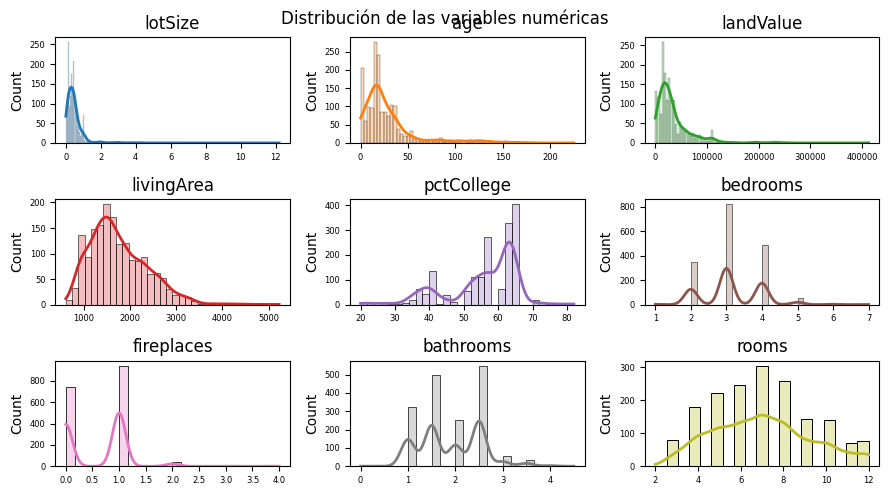

In [5]:
# 4. Distribución de las variables numéricas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat

numeric_columns = database.select_dtypes(include=['float64', 'int']).columns
numeric_columns = numeric_columns.drop('price')

for k, colum in enumerate(numeric_columns):
    sns.histplot(
        data     = database,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[k]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[k]
    )
    axes[k].set_title(colum)
    axes[k].tick_params(labelsize = 6)
    axes[k].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust()
fig.suptitle('Distribución de las variables numéricas')
plt.show()

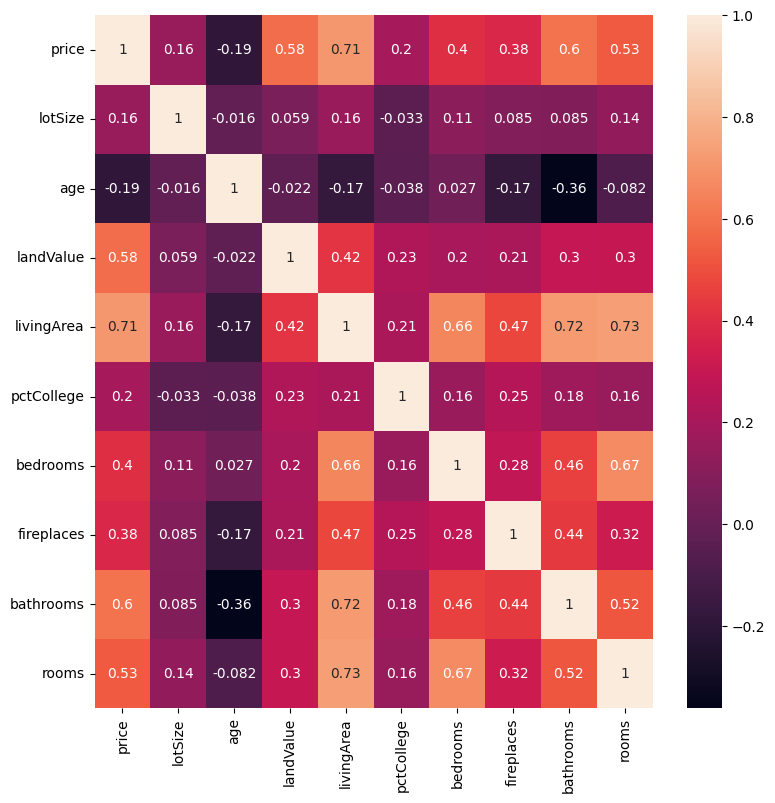

In [6]:
# 5. Correlación de las variables numéricas
fig = plt.figure(figsize = (9,9))
sns.heatmap(database[database.keys().drop(['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir'])].corr(), annot = True)
plt.show()

In [7]:
# 6. Procesamiento de los datos
X = np.array(database['livingArea']).reshape(-1, 1)
y = np.array(database['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 696)

In [8]:
# 6.1 Modelo con enfoque matricial
X_1 = np.hstack((np.ones(X_train.shape), X_train))

beta = np.linalg.pinv(X_1).dot(y_train)
beta

array([13986.95040044,   113.00111095])

In [9]:
# 6.1.1. Construimos el modelo de regresion lineal
y_train_pred = beta[1]*X_train + beta[0]
y_test_pred = beta[1]*X_test + beta[0]

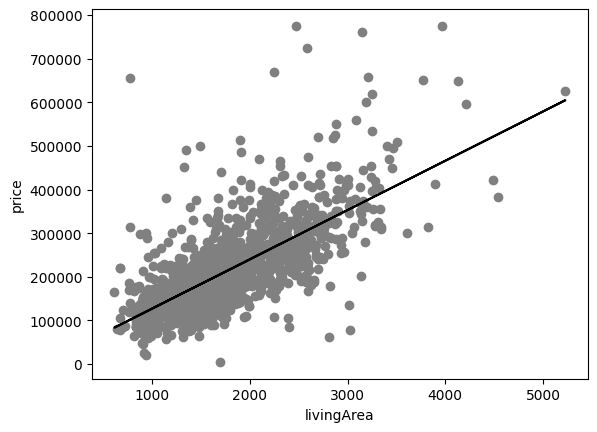

In [10]:
plt.figure()
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, y_train_pred, 'k')
plt.xlabel('livingArea')
plt.ylabel('price')
plt.show()

In [11]:
# 6.2 # Creacion del modelo de regresion lineal con scikit-learn
lrm_corvetti = LinearRegression()

# 6.2.1 Ajuste del modelo de regresion lineal
lrm_corvetti.fit(X = X_train, y = y_train)

# 6.2.2 Prediccion del modelo ajustado
y_train_pred_lrm = lrm_corvetti.predict(X_train)
y_test_pred_lrm = lrm_corvetti.predict(X_test)

# 6.2.3. Se obtienen sus coeficientes
print("lrm_corvetti.coef_: {}".format(lrm_corvetti.coef_))
print("lrm_corvetti.intercept_: {}".format(lrm_corvetti.intercept_))

lrm_corvetti.coef_: [113.00111095]
lrm_corvetti.intercept_: 13986.950400443282


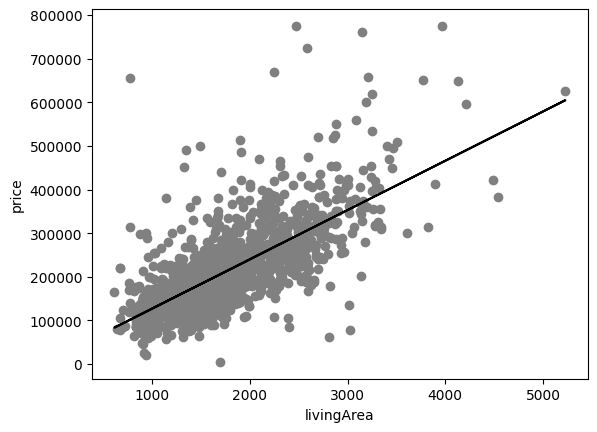

In [12]:
plt.figure()
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, y_train_pred_lrm, 'k')
plt.xlabel('livingArea')
plt.ylabel('price')
plt.show()

In [13]:
def regression_results(y_true, y_pred):
    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)

    print('explained_variance: ', round(ev,4))    
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('R²: ', round(r2,4))

In [14]:
# 7. Resultados y discusión.
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, y_train_pred)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, y_test_pred)
print("")


---------- Evaluation on Training Data ----------
explained_variance:  0.5064
MAE:  47497.486
MSE:  4807479175.15
R²:  0.5064

---------- Evaluation on Test Data ----------
explained_variance:  0.5102
MAE:  48980.1866
MSE:  4620452197.0991
R²:  0.5099



In [15]:
# 8. Validacion del modelo
cvs_scores = cross_val_score(
                estimator = lrm_corvetti,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
            )

print(f"Métricas validación cruzada: {cvs_scores}")
print(f"Média métricas de validación cruzada: {cvs_scores.mean()}")

Métricas validación cruzada: [-69875.73589663 -76086.0181869  -71166.8309373  -69033.05471735
 -59754.17216973]
Média métricas de validación cruzada: -69183.16238158187


In [16]:
cv_scores = cross_validate(
                estimator = lrm_corvetti,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                return_train_score = True
            )
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.001812,0.001637,0.479707,0.512684,-69875.735897,-69204.367432
1,0.001574,0.001739,0.432823,0.525581,-76086.018187,-67564.977647
2,0.001384,0.001298,0.532669,0.498776,-71166.830937,-68872.181207
3,0.000795,0.001044,0.534718,0.498714,-69033.054717,-69416.811674
4,0.000813,0.001268,0.553921,0.497072,-59754.172170,-71529.938626


---

# Ejercicio de clase I

¿Podemos utilizar más variables para hacer predicciones?

# Ejercicio de clase II

A partir de la solución al ejercicio anterior, considere la base de datos de {cite:t}`xu2020performance` para predecir la tasa de transferencia de calor (**HTR**).

---

# Modelo de regresión no lineal

Cuando existen relaciones no lineales complejas entre la variable dependiente $y$ y la variable independiente $x$, una relación polinomial puede ser necesaria para obtener un modelo y realizar predicciones. La forma general de un modelo de regresión polinomial está descrita como sigue

$$
 y = \beta_{0} + \beta_{1} \cdot x + \beta_{2} \cdot x^{2} + \dots + \beta_{n} \cdot x^{n},
$$
donde $\beta_{0}$ es un parámetro constante, $\beta_{1}$ el parámetro del efecto lineal, $\beta_{2}$ denota el parámetro del efecto cuadrático, y $n$ el grado del polinomio.

Por ejemplo, un polinomio de grado $n=2$ tiene la forma

$$
 y = \beta_{0} + \beta_{1} \cdot x + \beta_{2} \cdot x^{2},
$$ (eqn:poly_order_2)

mientras que uno de grado $n=3$

$$
 y = \beta_{0} + \beta_{1} \cdot x + \beta_{2} \cdot x^{2} + \beta_{3} \cdot x^{3},
$$

Para construir un modelo polinomial con `sci-kit learn` primero importamos `PolynomialFeatures` de `sklearn.preprocessing` y definimos el grado del polinomio de la siguiente manera

```python
 poly = PolynomialFeatures(degree=2, include_bias=False)
```

La instrucción anterior nos permite obtener un modelo de la forma {eq}`eqn:poly_order_2`. Si imprimimos `poly` sólo veremos una instancia de `PolynomialFeatures`. Para observar el modelo polinomial, declaramos el siguiente vector

```python
 X = np.arange(0, 10)
```

y realizamos la transformación de la variable de nuestro interés de la siguiente manera

```python
 poly.transform(X.reshape(-1, 1))
```

De este modo podemos observar en la primer columna la variable $\bf X$ mientras que en la segunda se presenta su transformación utilizando un polinomio de grado $n=2$.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(0, 10)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_features

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.],
       [ 6., 36.],
       [ 7., 49.],
       [ 8., 64.],
       [ 9., 81.]])

In [18]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_features

array([[  0.,   0.,   0.],
       [  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.],
       [  6.,  36., 216.],
       [  7.,  49., 343.],
       [  8.,  64., 512.],
       [  9.,  81., 729.]])

¿Cómo construimos un modelo de regresión polinomial en Python? 

Primero importamos la siguiente librería:

```python
 from sklearn.linear_model import LinearRegression
```

y creamos una instancia de `LinearRegression()` a una variable como se muestra a continuación:

```python
 poly_model = LinearRegression()
```

En este punto, podemos aplicar la misma metodología que seguimos para el caso del modelo de regresión lineal utilizando la base de datos de Corvetti.

In [19]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

In [20]:
# 6.2 # Creacion del modelo de regresion polinomial con scikit-learn
prm_corvetti = LinearRegression()

# 6.2.1 Ajuste del modelo de regresion lineal
prm_corvetti.fit(X = X_train_poly, y = y_train)

# 6.2.2 Prediccion del modelo ajustado
y_train_pred_prm = prm_corvetti.predict(X_train_poly)
y_test_pred_prm = prm_corvetti.predict(X_test_poly)

In [21]:
# 7. Resultados y discusión.
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, y_train_pred_prm)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, y_test_pred_prm)
print("")


---------- Evaluation on Training Data ----------
explained_variance:  0.5113
MAE:  47079.3567
MSE:  4760422013.0147
R²:  0.5113

---------- Evaluation on Test Data ----------
explained_variance:  0.5103
MAE:  48282.9279
MSE:  4618203024.2655
R²:  0.5102



In [25]:
# 8. Validacion del modelo
cvs_scores = cross_val_score(
                estimator = prm_corvetti,
                X         = X_train_poly,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
            )

print(f"Métricas validación cruzada: {cvs_scores}")
print(f"Média métricas de validación cruzada: {cvs_scores.mean()}")

Métricas validación cruzada: [-69626.76959223 -76417.64530197 -70830.01843376 -68384.40942981
 -59159.76349895]
Média métricas de validación cruzada: -68883.72125134405


In [26]:
cv_scores = cross_validate(
                estimator = prm_corvetti,
                X         = X_train_poly,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                return_train_score = True
            )
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.002204,0.001654,0.483408,0.517734,-69626.769592,-68844.815098
1,0.001434,0.001310,0.427868,0.532672,-76417.645302,-67058.139631
2,0.000974,0.001245,0.537082,0.503654,-70830.018434,-68536.217107
3,0.001002,0.001237,0.543421,0.502450,-68384.409430,-69157.585526
4,0.001194,0.001242,0.562752,0.501017,-59159.763499,-71248.816671


---

# Ejercicio de clase III

¿Podemos utilizar más variables para hacer predicciones?

# Ejercicio de clase IV

A partir de la solución al ejercicio anterior, considere la base de datos de {cite:t}`xu2020performance` para predecir la tasa de transferencia de calor (**HTR**).

---